In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
iris_data = load_iris()

# 데이터 셋 dataframe에 저장
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns = ['class'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)
y_train = y_train.values.ravel()  #경고메세지 출력 방지

In [6]:
# n_estimators: 결정 stump 몇개를 만들어서 예측 할 것인가. default = 10  -> 10개의결정 stump 만들기
model = AdaBoostClassifier(n_estimators = 100)

model.fit(X_train, y_train) #모델학습
model.predict(X_test) #모델로 test set 데이터 예측
model.score(X_test, y_test) #모델 성능 평가

0.8666666666666667

In [7]:
importances = model.feature_importances_

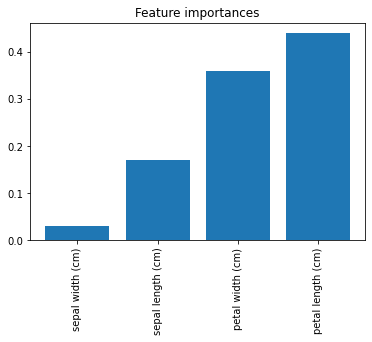

In [8]:
#시각화 코드 작성
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

#결정트리의 속성 중요도: petal width, petal length 가 중요함함